In [1]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

In [2]:
nc = '/Users/aliaga/Documents/Work_DA/Py-packs/ranking-hy/data/d1/ds_5.nc'
data = xr.open_dataset(nc)

data

<xarray.Dataset>
Dimensions:   (id: 3, Dp: 52, day: 1826, hour: 289, Dp_interval: 1)
Coordinates: (10/11)
  * Dp        (Dp) float64 2.818e-09 3.162e-09 3.548e-09 ... 8.913e-07 1e-06
  * id        (id) object 'nais' 'dmps' 'nd'
  * hour      (hour) float64 -24.0 -23.75 -23.5 -23.25 ... 47.25 47.5 47.75 48.0
  * day       (day) datetime64[ns] 2018-01-01 2018-01-02 ... 2022-12-31
    is_day    (hour) bool ...
    ...        ...
    n_day     (Dp_interval, day) int64 ...
    n_night   (Dp_interval, day) int64 ...
    g         (Dp_interval, day) object ...
    q         (Dp_interval, day) float64 ...
    qCut      (Dp_interval, day) object ...
Dimensions without coordinates: Dp_interval
Data variables:
    dndlDp    (id, Dp, day, hour, Dp_interval) float64 ...
    N         (Dp_interval, day, hour) float64 ...
    lN        (Dp_interval, day, hour) float64 ...
    lN_s      (Dp_interval, day, hour) float64 ...
    N_s       (Dp_interval, day, hour) float64 ...
    max_lN    (Dp_interval, day) float64 ...
    min_lN    (Dp_interval, day) float64 ...
    d_lN      (Dp_interval, day) float64 ...

0

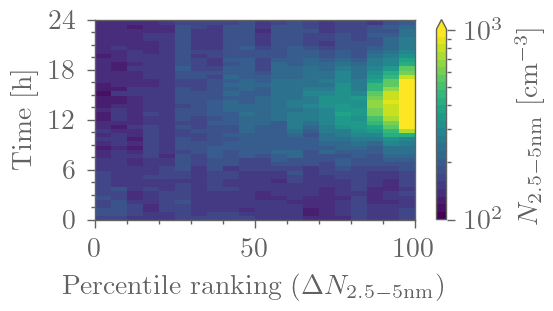

In [3]:
NN = r'$N_{2.5-5\mathrm{nm}} \ \mathrm{[cm^{-3}]}$'

#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    'acp',
    #'notebook',
    # 'sp-grid',
    'no-black',
    'illustrator-safe'
])

(
    data
    [['N_s']]
    .coarsen({'hour':2},boundary='pad').median()
    .assign_coords({'qr':lambda d:((d['q']+2.5)/5).round()*5-2.5})
    .groupby('qr')
    .median()
    .rename({'N_s':NN})
    [NN]

    .plot(
        x = 'qr',
        norm=mpl.colors.LogNorm(vmax=1.01e3,vmin=1e2),
        ylim=(0,24),
        cmap = plt.get_cmap('viridis',25)
    )
)
ax:plt.Axes = plt.gca()
ax.set_box_aspect(1/1.6)
ax.set_yticks(np.arange(0,25,6))
ax.set_ylabel('Time [h]')
ax.set_xlabel('Percentile ranking ($\\Delta N_{2.5-5\\mathrm{nm}}$)')
f:plt.Figure = plt.gcf()
f.set_size_inches(3,1.9)

import uscit
uscit.set_margin(f,x1=.5,y1=.5,y2=.4)
# uscit.set_fig_rule(f)
#region temp open fig
_p_ = 'f060_time_rank_N.pdf';plt.gcf().savefig(_p_,transparent=True);
os.system(f'open {_p_}')
#endregion temp open fig
